# Galerkin and Supercell methods for the Ten Martini problem

In [1]:
from specpol.ritz import ritz_tridiag, supercell
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [2]:
lda = 1
theta = 1
def diag(alpha):
    return lambda n: 2 * lda * np.cos(2*np.pi*(theta + n*alpha))

In [3]:
# regular Ritz method
spec = {}
for a in tqdm(np.linspace(-1, 1, 50)):
    spec[a] = ritz_tridiag(1, diag(a), 1, 500)

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [00:25<00:00,  1.98it/s]


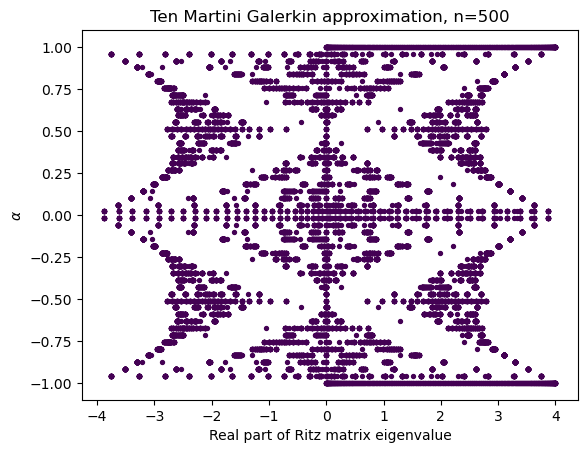

In [4]:
for alpha, vals in spec.items():
    plt.scatter(vals.real, [alpha]*len(vals), c = "#440154" ,s = 8)
plt.title("Ten Martini Galerkin approximation, n=500")
plt.xlabel("Real part of Ritz matrix eigenvalue")
plt.ylabel(r"$\alpha$")
plt.show()

In [5]:
dbm_spec = {}
for a in tqdm(np.linspace(-1, 1, 50)):
    dbm_spec[a] = ritz_tridiag(1, lambda n: diag(a)(n) + 1j*(abs(n)<750), 1, 500)

100%|██████████| 50/50 [01:13<00:00,  1.46s/it]


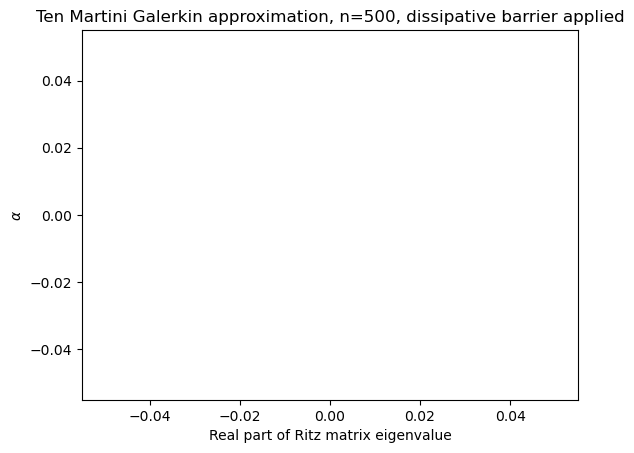

In [6]:
for alpha, vals in spec.items():
    filtered_vals = np.array([v for v in vals if v.imag>0.95])
    plt.scatter(filtered_vals.real, [alpha]*len(filtered_vals), c = "#440154" ,s = 8)
plt.title("Ten Martini Galerkin approximation, n=500, dissipative barrier applied")
plt.xlabel("Real part of Ritz matrix eigenvalue")
plt.ylabel(r"$\alpha$")
plt.show()

In [7]:
cell_spec = {}
for a in tqdm(np.linspace(-1, 1, 50)):
    cell_spec[a] = supercell(1, diag(a), 1, 500, alpha_samples=10)

  0%|          | 0/50 [00:00<?, ?it/s]/home/alexhroom/.local/lib/python3.11/site-packages/specpol/ritz/discrete.py:75: ComplexWarning: Casting complex values to real discards the imaginary part
  supercell_matrix[-1][0] = 1 / alpha
/home/alexhroom/.local/lib/python3.11/site-packages/specpol/ritz/discrete.py:76: ComplexWarning: Casting complex values to real discards the imaginary part
  supercell_matrix[0][-1] = subdiag(matrix_size // 2) * alpha
100%|██████████| 50/50 [05:24<00:00,  6.48s/it]


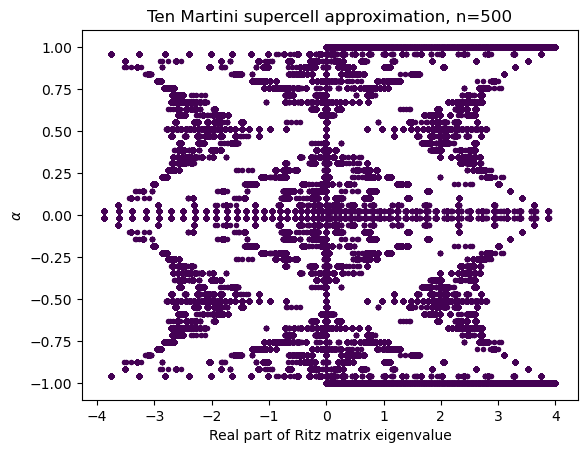

In [8]:
for alpha, vals in cell_spec.items():
    for theta_vals in vals.values():
        plt.scatter(theta_vals.real, [alpha]*len(theta_vals), c = "#440154" ,s = 8)
plt.title("Ten Martini supercell approximation, n=500")
plt.xlabel("Real part of Ritz matrix eigenvalue")
plt.ylabel(r"$\alpha$")
plt.show()